<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Correla%C3%A7%C3%A3o_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlação e Regressão Linear Simples**

### **Análise e Tratamento dos Dados**

In [1]:
import pandas as pd
import numpy as np

In [2]:
arquivo = '/content/drive/MyDrive/Udemy/rigidez.csv'
medicao = pd.read_csv( arquivo, sep=';', encoding='iso-8859-1')
# encoding - codificação de caracteres, normalmente usa-se iso-8859-1, utf-8, latin-1

**Objetivo** - Avaliar a correlação entre a força e a deformação sofrida por uma mola e criar um modelo de **Regressão Linear**.

In [3]:
medicao.head()

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [4]:
medicao.shape

(30, 6)

In [5]:
# Renomear uma variável
medicao.rename(columns={'Lo': 'compr_inicial', 'L': 'compr_final', 'x': 'deformacao', 'K': 'rigidez'}, inplace=True)

# OU ( sem o inplace = True )
medicao = medicao.rename(columns={'Lo': 'compr_inicial', 'L': 'compr_final', 'x': 'deformacao', 'K': 'rigidez'})
medicao.head()

,cargas,forca,compr_inicial,compr_final,deformacao,rigidez
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [6]:
# Análie dos tipos de atributos

# object  : string
# int64   : inteiros
# float   : reais
# complex : complexos
medicao.dtypes

cargas             int64
forca            float64
compr_inicial    float64
compr_final      float64
deformacao       float64
rigidez          float64
dtype: object

In [7]:
# Excluir variável
medicao = medicao.drop(columns = ['compr_inicial'], axis=1)
medicao.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


Valores Missing ( **Nan** )

In [8]:
# Relação da Quantidade de Valores Nulos
medicao.isnull().sum()

cargas         0
forca          0
compr_final    1
deformacao     1
rigidez        1
dtype: int64

In [9]:
# Saber somente os valores Missing de determinadas colunas
medicao['deformacao'].isnull().sum()

1

Tratamento

In [10]:
# Excluir ou Preencher ( Valores Faltantes )

#EXCLUIR todos os valores MISSING
medicao = medicao.dropna()

medicao.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [11]:
medicao.describe()

,cargas,forca,compr_final,deformacao,rigidez
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.931034,1.565172,139.050690,0.112050,30.823448
std,8.631053,0.961567,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,9.000000,0.720000,50.000000,0.023000,30.770000
50%,16.000000,1.550000,76.400000,0.049400,31.300000
75%,23.000000,2.250000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


In [ ]:
# SUBSTITUIR os valores MISSING pela MEDIANA
medicao['compr_final'].fillna(medicao['compr_final'].median(), inplace=True)

In [ ]:
medicao.isnull().sum()

cargas         0
forca          0
compr_final    0
deformacao     1
rigidez        1
dtype: int64

In [ ]:
# Substituir os valores MISSING pela MÉDIA
medicao['deformacao'].fillna( medicao['deformacao'].mean(), inplace=True)

In [ ]:
medicao.isnull().sum()

cargas         0
forca          0
compr_final    0
deformacao     0
rigidez        1
dtype: int64

In [ ]:
# Substituir os valores MISSING pela MODA ( valor que mais aparece )
print( medicao['rigidez'].value_counts() )
valor_moda = 30.81

medicao['rigidez'].fillna( valor_moda, inplace=True )
medicao.describe()

30.81    3
31.30    2
34.48    1
1.64     1
30.77    1
31.89    1
31.40    1
30.57    1
30.93    1
30.63    1
30.54    1
30.18    1
29.68    1
31.38    1
34.88    1
31.91    1
31.03    1
33.63    1
33.87    1
33.33    1
33.66    1
31.98    1
31.25    1
36.34    1
32.86    1
30.02    1
Name: rigidez, dtype: int64


,cargas,forca,compr_final,deformacao,rigidez
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1.519000,136.962333,0.112050,30.823000
std,8.803408,0.978103,337.694225,0.337501,5.738879
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,8.250000,0.690000,50.475000,0.023475,30.780000
50%,15.500000,1.450000,76.400000,0.052450,31.275000
75%,22.750000,2.235000,99.430000,0.077060,32.640000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


Análise dos outliers

In [12]:
import plotly.express as px

In [13]:
boxplot = px.box(medicao, y='forca')
boxplot.show()

In [14]:
boxplot = px.box(medicao, y='deformacao')
boxplot.show()

In [15]:
medicao.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [16]:
# Apagar a linha com valor outlier
remover = medicao.loc[ (medicao['deformacao'] > 1.5) ]
medicao.drop( remover.index, inplace = True )

# OU pelo índice da linha
# medicao.drop(28, inplace=True)

medicao.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [17]:
boxplot = px.box(medicao, y='rigidez')
boxplot.show()

In [18]:
medicao.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [19]:
%%timeit
remover = medicao.loc[(medicao['rigidez'] > 36.5)]

medicao.drop(remover.index, inplace=True)

625 µs ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
medicao.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


### **Análise da Correlação Linear**

In [21]:
import matplotlib.pyplot as plt

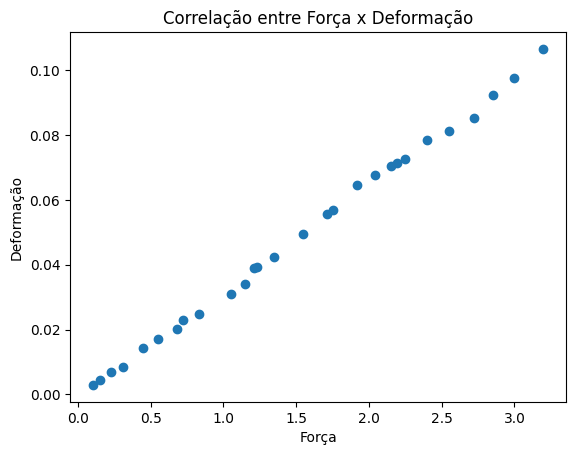

In [22]:
plt.scatter(medicao['forca'], medicao['deformacao'])
plt.title('Correlação entre Força x Deformação')
plt.xlabel('Força')
plt.ylabel('Deformação')
plt.grid(False)
plt.show()

In [23]:
import seaborn as sns

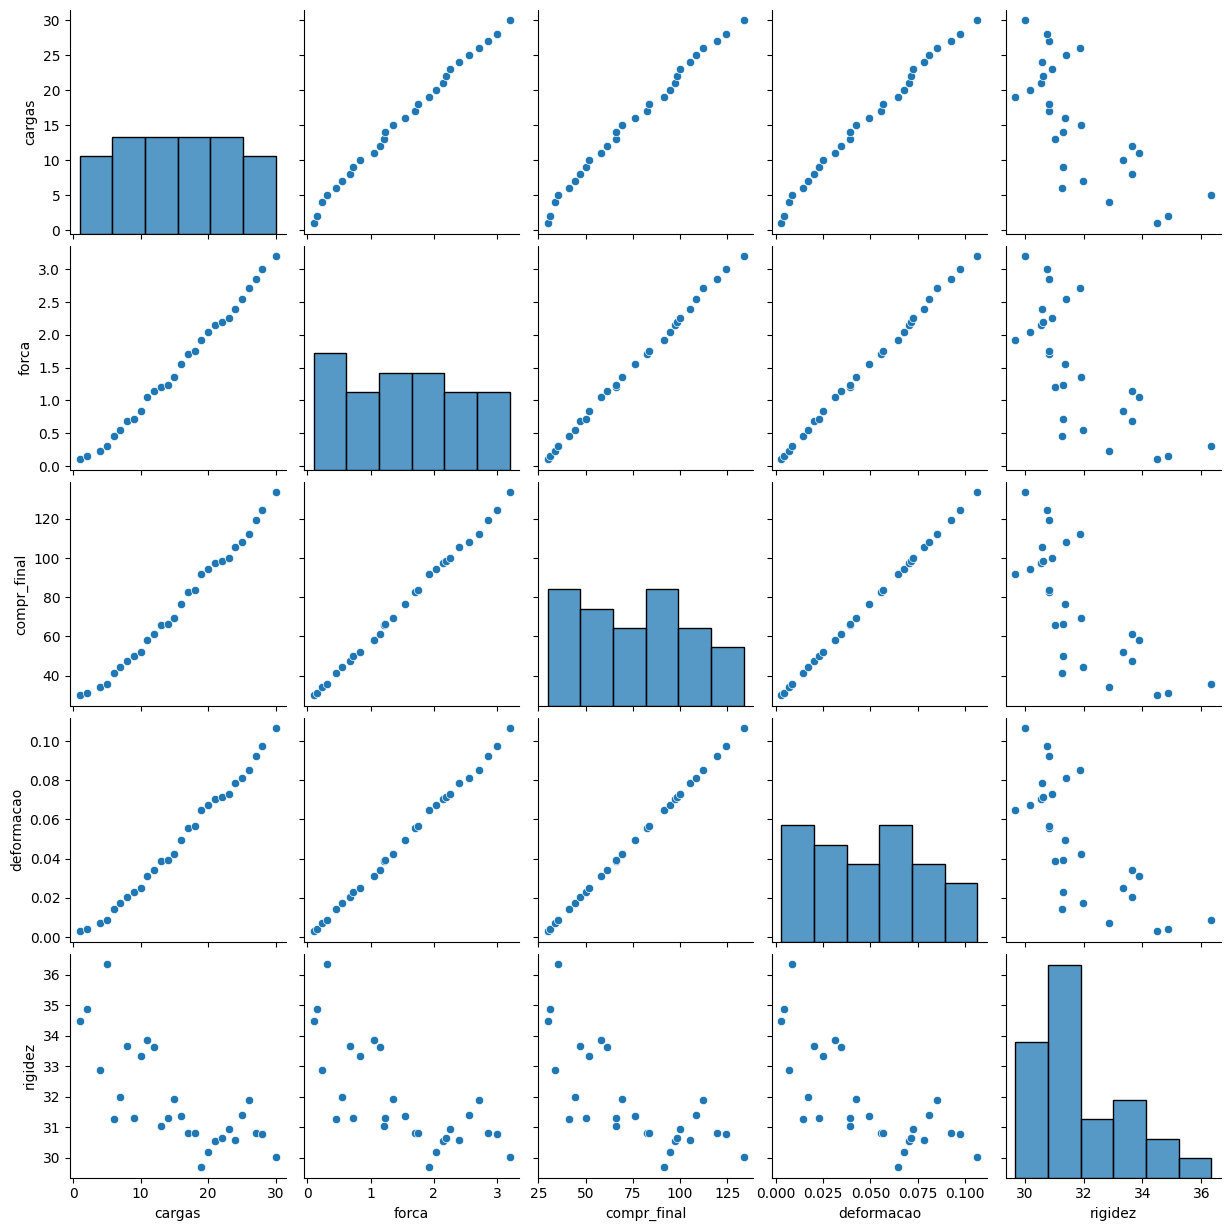

In [24]:
sns.pairplot(medicao);

### **Análise da Normalidade**

In [25]:
import scipy.stats as stats

Gráfico QQ-Plot

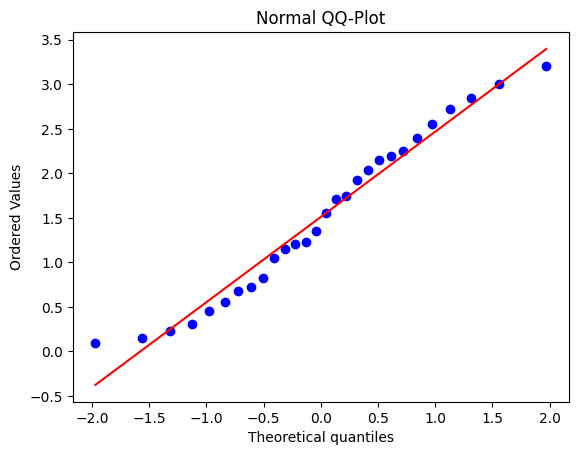

In [26]:
stats.probplot(medicao['forca'], dist='norm', plot=plt)
plt.title('Normal QQ-Plot')
plt.show()

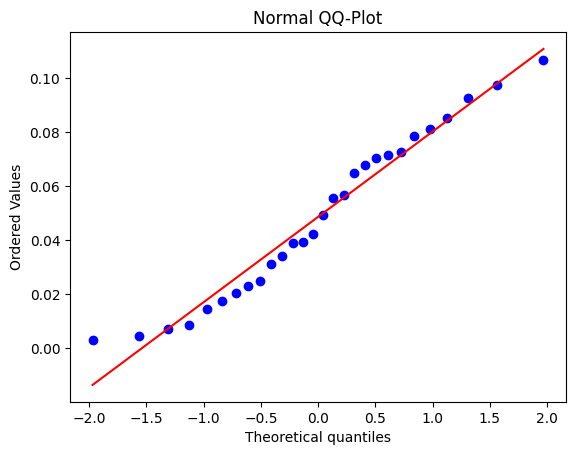

In [27]:
stats.probplot(medicao['deformacao'], dist='norm', plot=plt)
plt.title('Normal QQ-Plot')
plt.show()

Teste Shapiro-Wilk

Ho (nula) - Distribuição Normal: P > 0.05 ( podemos usar PEARSON )

Ha (alternativa) - Distribuição != Normal: p <= 0.05

In [28]:
stats.shapiro(medicao['forca'])

ShapiroResult(statistic=0.9576825499534607, pvalue=0.306829571723938)

In [29]:
estatistica, p = stats.shapiro(medicao['forca'])
print('Estatística do teste {:.1f}%'.format(estatistica*100))
print('p-value {}'.format(p))

Estatística do teste 95.8%
p-value 0.306829571723938


In [30]:
estatistica, p = stats.shapiro(medicao['deformacao'])
print('Estatística do teste {:.1f}%'.format(estatistica * 100))
print('p-value {}'.format(p))

Estatística do teste 95.5%
p-value 0.2625334858894348


Teste Lilliefors (Komolgorov Sminorv)


Ho (nula) - Distribuição Normal: P > 0.05 ( podemos usar PEARSON )

Ha (alternativa) - Distribuição != Normal: p <= 0.05

In [31]:
import statsmodels

# OU
from statsmodels.stats.diagnostic import lilliefors

In [32]:
estatistica, p = lilliefors(medicao['forca'], dist='norm')
print('Estatística do teste {:.1f}%'.format(estatistica * 100))
print('p-value {}'.format(p))

Estatística do teste 8.9%
p-value 0.8198097045523484


In [33]:
estatistica, p = lilliefors(medicao['deformacao'], dist='norm')
print('Estatística do teste {:.1f}%'.format(estatistica * 100))
print('p-value {}'.format(p))

Estatística do teste 10.0%
p-value 0.6675380103986344


### **Correlação Linear**

Pearson ( distribuição normal )

Spearman ( distribuição não normal )

Kendall ( distribuição não normal com quantidade pequena de amostras )

Ho - Não há Correlação Linear: p > 0.05

Ha - Existe Correlação Linear: p <= 0.05

In [34]:
# Pearson
coef, p = stats.pearsonr(medicao['deformacao'], medicao['forca'])
print('Coeficiente de Corelação Linear {:.2f}%'.format(coef * 100))
print('p-value {}'.format(p))

Coeficiente de Corelação Linear 99.91%
p-value 4.36288535226053e-37


In [35]:
# Spearman
coef, p = stats.spearmanr(medicao['deformacao'], medicao['forca'])
print('Coeficiente de Corelação Linear {:.2f}%'.format(coef * 100))
print('p-value {}'.format(p))

Coeficiente de Corelação Linear 100.00%
p-value 4.0494065550148204e-201


In [36]:
# Kendall
coef, p = stats.kendalltau(medicao['deformacao'], medicao['forca'])
print('Coeficiente de Corelação Linear {:.2f}%'.format(coef * 100))
print('p-value {}'.format(p))

Coeficiente de Corelação Linear 100.00%
p-value 6.559778474139676e-30


Correlação

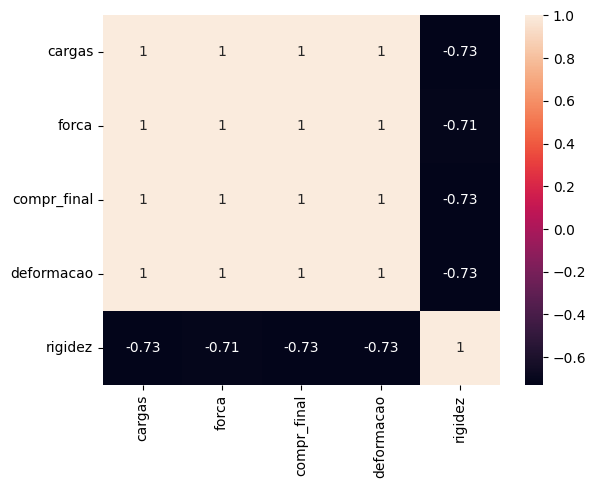

In [37]:
correlacao = medicao.corr(method='pearson')
plt.figure()
sns.heatmap(correlacao, annot=True);

### **Modelo de Regressão Linear**

Regressão com Statsmodels

In [38]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [39]:
# Criação do Modelo
regressao = smf.ols( 'forca ~ deformacao', data = medicao).fit()

In [40]:
# Diferença entre os valores reais x valores preditos
residuos = regressao.resid
residuos

0    -0.031277
1    -0.023602
3    -0.025230
4     0.009421
5    -0.028951
6    -0.013603
7     0.025700
8    -0.018951
9     0.033607
10    0.069188
11    0.072444
12   -0.012673
13   -0.001742
14    0.027560
15    0.012909
16   -0.011510
17   -0.010812
18   -0.079650
19   -0.047324
20   -0.021975
21   -0.015231
22    0.007280
23   -0.016859
24    0.051513
25    0.097559
26    0.009885
27    0.008722
29   -0.066394
dtype: float64

#### Teste de Normalidade dos Resíduos

Ho - Distribuição Normal: p > 0.05

Ha - Distribuição != Normal: p <= 0.05

In [41]:
estatistica, p = stats.shapiro(residuos)
print('Estatística do teste {:.2f}%'.format(estatistica * 100))
print('p-value {}'.format(p))

Estatística do teste 95.99%
p-value 0.3476985692977905


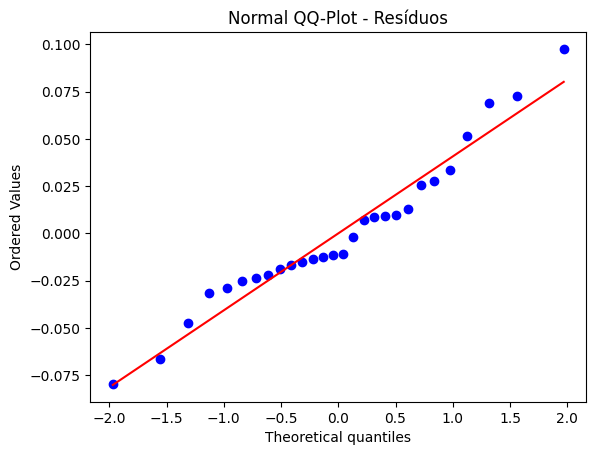

In [42]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal QQ-Plot - Resíduos')
plt.show()

#### Análise da Homocedasticidade ( como estão distribuídos os resíduos )

Espera-se resíduos com variação constante

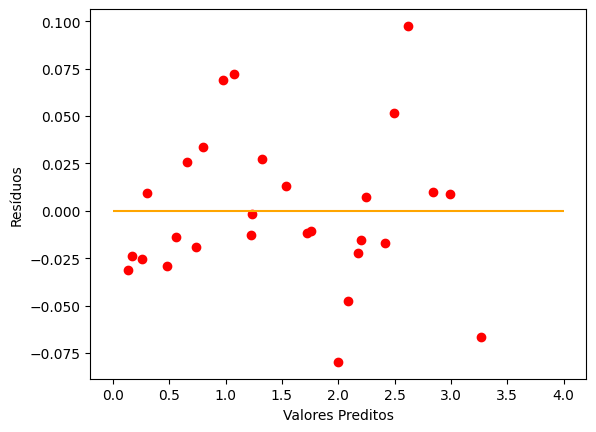

In [43]:
plt.scatter(x=regressao.predict(), y=residuos, color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

# Pelo gráfico gerado não podemos afirmar que passou no teste.
# Os pontos deveriam ter ficado dentro de um "retângulo" imaginário, porém temos algus pontos dispersos

Teste Breusch-Pagan (Homocedasticidade e Heterocedasticidade)

Ho - Existe Homocedasticidade: p > 0.05

Ha - Não Existe Homocedasticidade: p <= 0.05

In [44]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [45]:
estatistica, p, f, fp = sms.het_breuschpagan( regressao.resid, regressao.model.exog )
print('Estatística do teste {}%'.format( estatistica ))
print('p-value {}'.format(p))
print('f-value {}'.format(f))
print('f_p-value {}'.format(fp))

Estatística do teste 1.9571121097946222%
p-value 0.16182251015029236
f-value 1.9538891028209564
f_p-value 0.17398144365103868


### **Outliers nos Resíduos**

( Entre -3 e 3 )

In [46]:
outliers = regressao.outlier_test()

In [47]:
outliers.max()

student_resid    2.823202
unadj_p          0.966231
bonf(p)          1.000000
dtype: float64

In [48]:
outliers.min()

student_resid   -2.132762
unadj_p          0.009195
bonf(p)          0.257448
dtype: float64

### **Modelo APROVADO**

### **Regressão Linear**

In [49]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  forca   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           4.36e-37
Time:                        22:04:04   Log-Likelihood:                 50.909
No. Observations:                  28   AIC:                            -97.82
Df Residuals:                      26   BIC:                            -95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0436      0.015      2.994      0.0

Estatística t:

Ho - coeficiente igual a zero: p > 0.05 (coeficiente não validado)

Ha - coeficiente diferente de zero: p <= 0.05 (coeficiente validado)

**Equação: forca = 0.0436 + 30.2326 * deformacao**

In [51]:
coeficientes = pd.DataFrame(regressao.params)
coeficientes.columns = ['Coeficientes']
print(coeficientes)

            Coeficientes
Intercept       0.043602
deformacao     30.232571


In [52]:
regressao.predict()

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

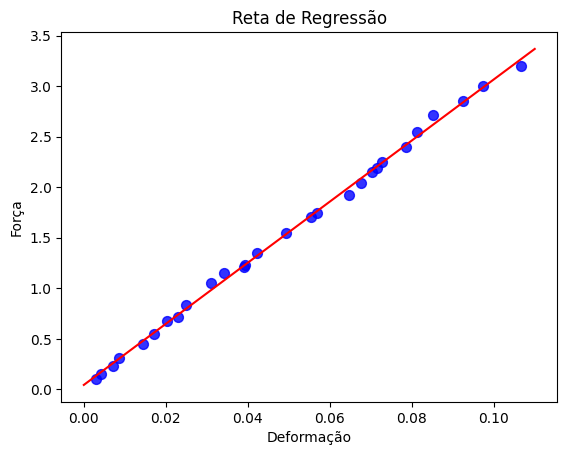

In [61]:
plt.scatter(x = medicao['deformacao'], y = medicao['forca'], color='blue', s=50, alpha=0.80)
X_plot = np.linspace(0, 0.11)
plt.plot(X_plot, regressao.params[0] + X_plot * regressao.params[1], color='r')
plt.title('Reta de Regressão')
plt.ylabel('Força')
plt.xlabel('Deformação')
plt.show()

### **Regressão Linear com sklearn**

In [62]:
medicao.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [72]:
X = medicao.iloc[:, 3].values
y = medicao.iloc[:, 1].values

In [73]:
correlacao = np.corrcoef(X,y)
correlacao

array([[1.        , 0.99907852],
       [0.99907852, 1.        ]])

In [76]:
X = X.reshape(-1, 1)
X

array([[0.0029 ],
       [0.0043 ],
       [0.007  ],
       [0.0085 ],
       [0.0144 ],
       [0.0172 ],
       [0.0202 ],
       [0.023  ],
       [0.0249 ],
       [0.031  ],
       [0.0342 ],
       [0.039  ],
       [0.0393 ],
       [0.0423 ],
       [0.0494 ],
       [0.0555 ],
       [0.0568 ],
       [0.0647 ],
       [0.0676 ],
       [0.0704 ],
       [0.0715 ],
       [0.07274],
       [0.0785 ],
       [0.0812 ],
       [0.0853 ],
       [0.0925 ],
       [0.0975 ],
       [0.1066 ]])

In [77]:
from sklearn.linear_model import LinearRegression

regressao = LinearRegression()
regressao.fit(X, y);

In [78]:
regressao.intercept_

0.04360236653479488

In [79]:
regressao.coef_

array([30.23257099])

In [80]:
# Coeficiente de Determinação
regressao.score(X, y)

0.9981578830655694

**Equação: forca = 0.04360236653479488 + 30.23257099 * deformacao**

**R^2 Ajustado = 0.998157**

In [82]:
previsoes = regressao.predict(X)
previsoes

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

In [89]:
deformacao = 0.45
previsao = regressao.predict([[deformacao]])
print(f'Para uma deformação de {deformacao} a força de ser de {previsao} N')

Para uma deformação de 0.45 a força de ser de [13.64825931] N
